# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции:

$tg^2(sin(x) + cos(2x+3))$

в точке $x_0=1$


In [9]:
### YOUR CODE HERE
'''Вариант 1'''

# импортируем библиотеку SymPy для работы с символьными вычислениями
x = symbols('x')
diff_1 = diff((tan(sin(x)+cos(2*x+3)))**2)
diff_1 #Первая производная функции

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [10]:
x0 = 1
diff_1_x0 = diff_1.subs({x:x0}) #Подставляем значение x0
diff_1_x0

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

In [11]:
diff_1_x0.n() #Находим числовое значение первой производной в точке x0=1

55.3859176353379

In [12]:
'''Вариант 2'''
from scipy.misc import derivative

In [13]:
def f(x):
    return (tan(sin(x)+cos(2*x+3)))**2

In [14]:
derivative(f, 1.0, dx=1e-6)

<ipython-input-14-7ce0b3a04ef8>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f, 1.0, dx=1e-6)


55.3859176433136

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

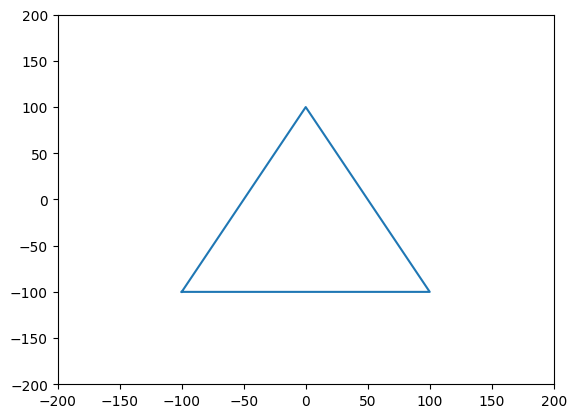

In [15]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


In [16]:
### YOUR CODE HERE
#Создаем линейные операторы, с помощью которых исходная матрица
#будет масштабирована на 0.5 и 1.2 соответственно
B_1 = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5]])
B_2 = np.array([[1.2, 0, 0], [0, 1.2, 0], [0, 0, 1.2]])
print(B_1)
print(B_2)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
[[1.2 0.  0. ]
 [0.  1.2 0. ]
 [0.  0.  1.2]]


In [17]:
#С помощью цикла перебираем координаты точек А и задаем им новые значения

tt_1=[]
tt_2=[]
for kk in A:
    tt_1.append(B_1@kk)
    tt_2.append(B_2@kk)

In [18]:
print(tt_1)
print(tt_2)

[array([-50. , -50. ,   0.5]), array([ 0. , 50. ,  0.5]), array([ 50. , -50. ,   0.5]), array([-50. , -50. ,   0.5])]
[array([-120. , -120. ,    1.2]), array([  0. , 120. ,   1.2]), array([ 120. , -120. ,    1.2]), array([-120. , -120. ,    1.2])]


(-200.0, 200.0)

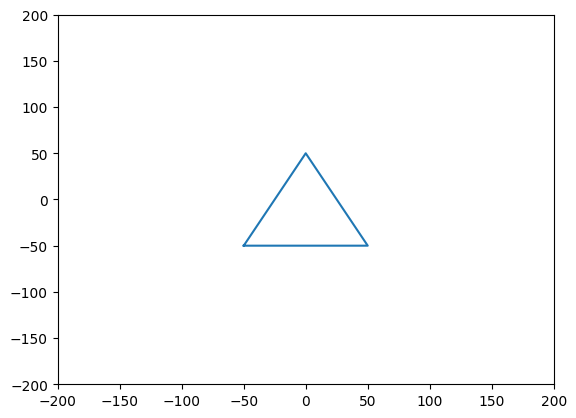

In [19]:
A_1=np.array(tt_1)
x = A_1[:,0]
y = A_1[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(-200.0, 200.0)

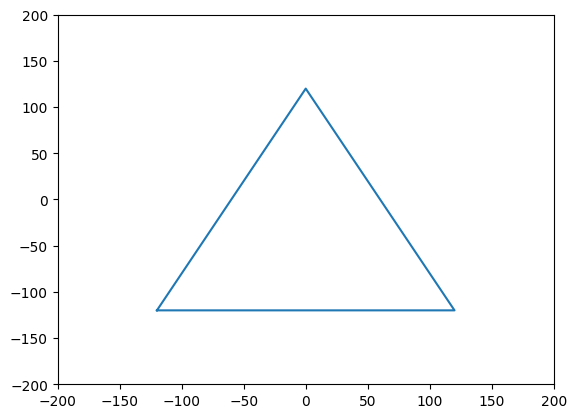

In [21]:
A_2=np.array(tt_2)
x = A_2[:,0]
y = A_2[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [22]:
#Создаем линейные операторы, с помощью которых 2 новых матрицы
#будут смещены на 200 (наприvер, по горизонтали вправо) и 300 (например, по вертикали вверх) соответственно
C_1 = np.array([[200, 0, 0], [200, 0, 0], [200, 0, 0], [200, 0, 0]])
C_2 = np.array([[0, 300, 0], [0, 300, 0], [0, 300, 0], [0, 300, 0]])
print(C_1)
print(C_2)

[[200   0   0]
 [200   0   0]
 [200   0   0]
 [200   0   0]]
[[  0 300   0]
 [  0 300   0]
 [  0 300   0]
 [  0 300   0]]


(0.0, 400.0)

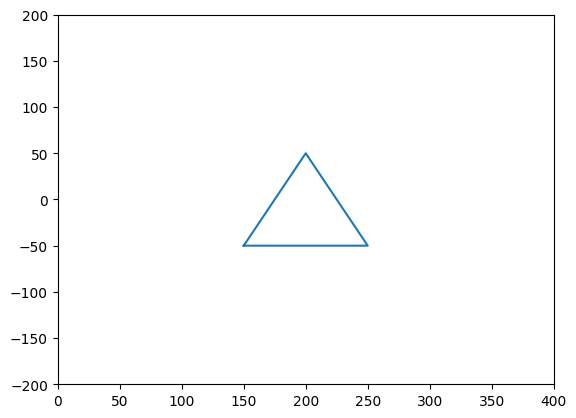

In [23]:
A_3 = A_1 + C_1
x = A_3[:,0]
y = A_3[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([0, 400])

(-250.0, 250.0)

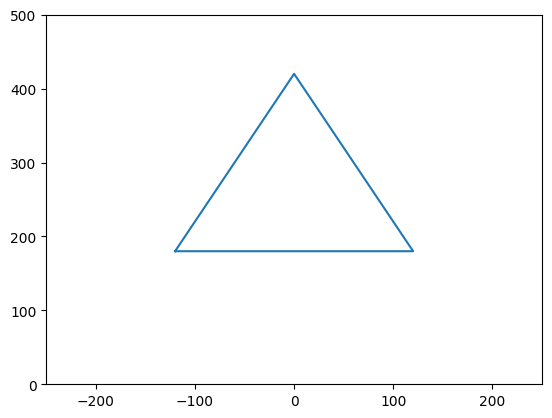

In [24]:
A_4 = A_2 + C_2
x = A_4[:,0]
y = A_4[:,1]
plt.plot(x, y)
plt.ylim([0, 500])
plt.xlim([-250, 250])

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [25]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [26]:
### YOUR CODE HERE
#Находим собственные значения (eval) и векторы (evec)
eval, evec = np.linalg.eig(m)
print(f'Собственные значения:\n {eval}')
print(f'Собственные векторы:\n {evec}')

Собственные значения:
 [ 3. -1.]
Собственные векторы:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [27]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [28]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

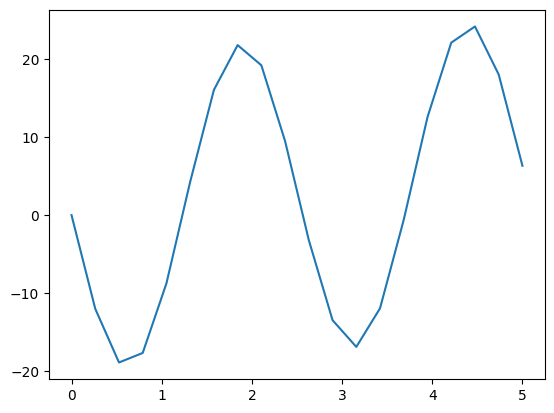

In [29]:
plt.plot(x, fx)
plt.show()

In [30]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [41]:
### YOUR CODE HERE
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

**COBYLA method**

In [49]:
x0 = ([1, 3])
res=minimize(error, x0, method='COBYLA')
print(f'Оптимальные параметры a, b, минимизирующие абсолютную ошибку error:\n a={res.x[0]}, b={res.x[1]}')

Оптимальные параметры a, b, минимизирующие абсолютную ошибку error:
 a=0.46521897154768366, b=6.48148254251909


**DIFFERENTIAL EVOLUTION**

In [55]:
bounds = [(-30,30), (-30,30)]

In [74]:
result_1 = differential_evolution(error, bounds, seed = 42)
print(f'Оптимальные параметры a, b, минимизирующие абсолютную ошибку error:\n a={result_1.x[0]}, b={result_1.x[1]}')

Оптимальные параметры a, b, минимизирующие абсолютную ошибку error:
 a=2.9999999975812175, b=21.376104167269986


In [76]:
result_2 = differential_evolution(error, bounds, seed = 42, strategy='best1exp', tol=0.1)
result_2

 message: Optimization terminated successfully.
 success: True
     fun: 232.88202009657232
       x: [ 2.130e+00 -2.972e+00]
     nit: 5
    nfev: 429

In [77]:
print(f'Оптимальные параметры a, b, минимизирующие абсолютную ошибку error:\n a={result_2.x[0]}, b={result_2.x[1]}')

Оптимальные параметры a, b, минимизирующие абсолютную ошибку error:
 a=2.13010318597056, b=-2.971531123172775


In [83]:
minimizer_kwargs = {'method': 'COBYLA', 'bounds': bounds}
result_3 = differential_evolution(error, bounds, polish=False)
minimize(error, result_3.x, **minimizer_kwargs)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.0651675052862073
       x: [ 3.000e+00 -2.638e+01]
    nfev: 25
   maxcv: 0.0

In [84]:
print(f'Оптимальные параметры a, b, минимизирующие абсолютную ошибку error:\n a={result_3.x[0]}, b={result_3.x[1]}')

Оптимальные параметры a, b, минимизирующие абсолютную ошибку error:
 a=3.0000000035160768, b=-26.37610416736034


**CURVE FIT**

In [72]:
from scipy.optimize import curve_fit

res = curve_fit(f, x, fx, p0=[1, 1], method='trf') #p0 - мои предполагаемые параметры a и b для функции fx
print(res)
#где res[0] это popt (оптимальные параметры (a - res[0][0], b - res [0][1]) для функции f)
#где res[1] это pcov (ковариационная матрица (для оценки ошибок в параметрах))
# Параметр a отвечает за масштабирование функции, b - за ее периодичность.


(array([1.60514318, 1.58606242]), array([[ 0.80741621, -0.02752967],
       [-0.02752967,  0.10819338]]))


(array([1.60526686, 1.585957  ]), array([[ 0.80727094, -0.02754325],
       [-0.02754325,  0.10814965]]))


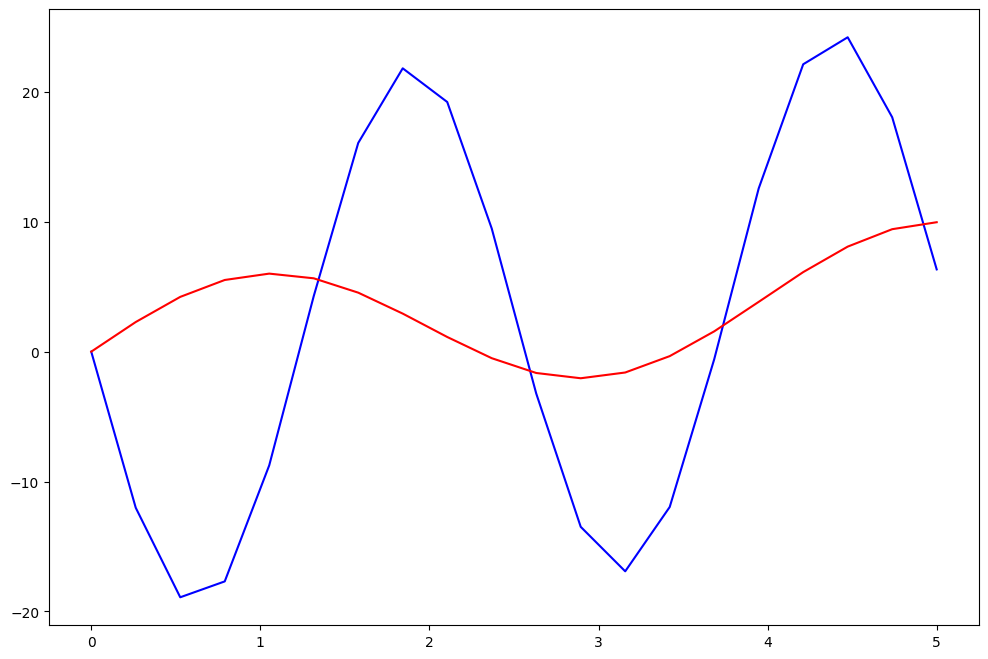

In [73]:
p0=np.array([2, 2])
res_ = curve_fit(f, x, fx, p0, method='trf') #p0 - мои предполагаемые параметры a и b для функции fx
print(res_)
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, res_[0][0], res_[0][1]), color='red')
plt.show()

In [66]:
for kk in range(50):
    p0=np.random.randint(-10, 10, size=(2,))
    print(p0)
    try:
        res_ = curve_fit(f, x, fx, p0, method='trf') #p0 - мои предполагаемые параметры a и b для функции f
        print(res_)
        plt.figure(figsize=(12, 8))
        plt.plot(x, fx, color='blue')
        plt.plot(x, f(x, res_[0][0], res_[0][1]), color='red')
        plt.show()
    except RuntimeError:
        print('Некорректные значения p0')
#Из случайных p0, при p0 = [9,-2] / [4, -3] / [8, -2] / [-5, -3] / [2, -2] / [3, -2] функции совпадают
#

Output hidden; open in https://colab.research.google.com to view.

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [166]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [167]:
### YOUR CODE HERE
import pandas as pd
import numpy as np

In [168]:
'''
Функция "cosine" помогает рассчитать косинусную меру для определения похожести векторов

Аргументы:
  raitings_comparison - матрица рейтинга фильмов, за исключением пользователя, который взят за базу сравнения
  user_example - пользователь, который взят за базу сравнения

Переменные:
  raitings_comparison_length - матричная норма
  user_example_length - векторная норма
'''

def cosine(raitings_comparison, user_example):
      raitings_comparison_length = np.linalg.norm(raitings_comparison)
      user_example_length = np.linalg.norm(raitings[i])
      return np.dot(raitings_comparison, user_example) / (raitings_comparison_length * user_example_length)

In [174]:
i=0 # индекс пользователя
while i < len(raitings):
    raitings_comparison = np.delete(raitings, i, axis=0) # задаем матрицу рейтинга фильмов, за исключением пользователя, который взят за базу сравнения
    user_example = raitings[i] # пользователь, который взят за базу сравнения (он же User i+1 в матрице ratings)
    cosine_result = np.array([cosine(row, user_example) for row in raitings_comparison]) #по каждому пользователю из raitings_comparison получаем косинусное сходство с user_example
    best_user = np.argmax(cosine_result) #получаем индекс пользователя из cosine_result с лучшим сходством

    if best_user >= i:
        print(f'Пара {i+1}: User {i+1} - User {best_user+2}') #best_user+2 - номер пользователя в матрице ratings
    else:
        print(f'Пара {i+1}: User {i+1} - User {best_user+1}') #best_user+1 - номер пользователя в матрице ratings

    i+=1

Пара 1: User 1 - User 9
Пара 2: User 2 - User 5
Пара 3: User 3 - User 10
Пара 4: User 4 - User 10
Пара 5: User 5 - User 9
Пара 6: User 6 - User 10
Пара 7: User 7 - User 4
Пара 8: User 8 - User 6
Пара 9: User 9 - User 1
Пара 10: User 10 - User 3
